In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("post_quantum_papers_detailed.csv")
df.head()

,title,authors,date
0,PLS-Assisted Offloading for Edge Computing-Ena...,"['Hamid Amiriara', 'Mahtab Mirmohseni', 'Rahim...","13 April, 2025"
1,An LLM Framework For Cryptography Over Chat Ch...,"['Danilo Gligoroski', 'Mayank Raikwar', 'Sonu ...","11 April, 2025"
2,A Hybrid Chaos-Based Cryptographic Framework f...,"['Kevin Song', 'Noorullah Imran', 'Jake Y. Che...","11 April, 2025"
3,Development of a Quantum-Resistant File Transf...,"['Ernesto Sola-Thomas', 'Masudul H Imtiaz']","10 April, 2025"
4,More Efficient Stealth Address Protocol,"['Marija Mikic', 'Mihajlo Srbakoski', 'Strahin...","9 April, 2025"


In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['authors'] = df['authors'].apply(lambda x: eval(x) if isinstance(x, str) else [])

df_exploded = df.explode('authors')
df_exploded['authors'] = df_exploded['authors'].str.strip()

df_exploded['year'] = df_exploded['date'].dt.year

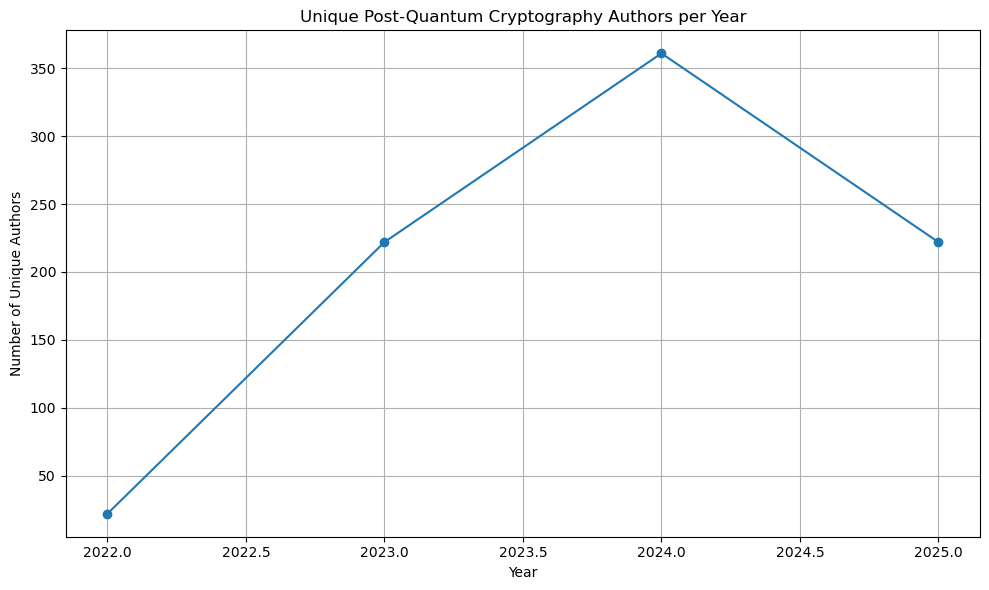

In [4]:
authors_per_year = df_exploded.groupby('year')['authors'].nunique().reset_index()
authors_per_year.columns = ['Year', 'Unique Authors']

plt.figure(figsize=(10, 6))
plt.plot(authors_per_year['Year'], authors_per_year['Unique Authors'], marker='o')
plt.title("Unique Post-Quantum Cryptography Authors per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Authors")
plt.grid(True)
plt.tight_layout()
plt.show()


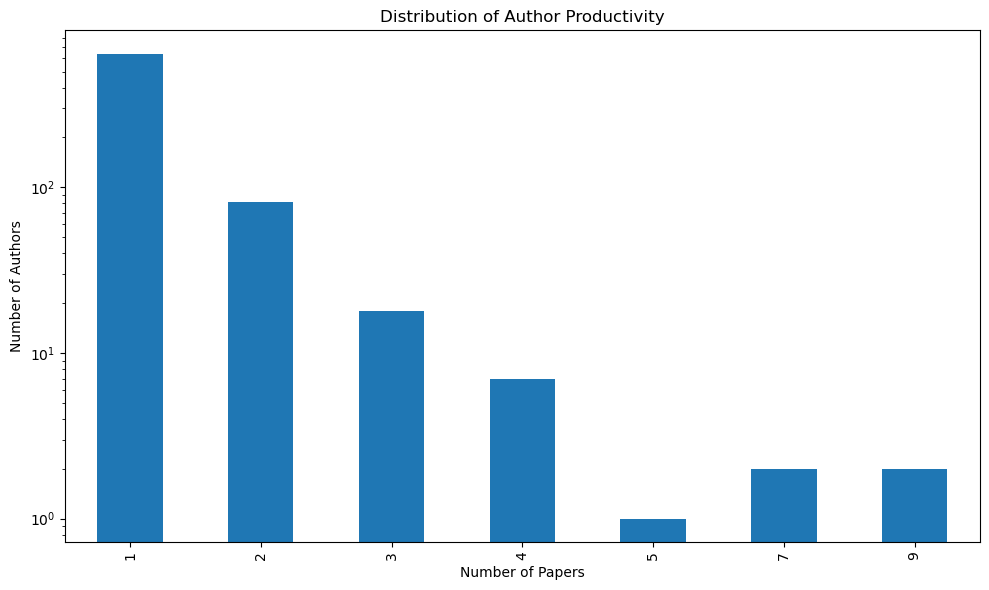

In [5]:
author_counts = df_exploded['authors'].value_counts().reset_index()
author_counts.columns = ['Author', 'Paper Count']

plt.figure(figsize=(10, 6))
author_counts['Paper Count'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Author Productivity")
plt.xlabel("Number of Papers")
plt.ylabel("Number of Authors")
plt.yscale("log")  # Optional: log scale if long tail
plt.tight_layout()
plt.show()


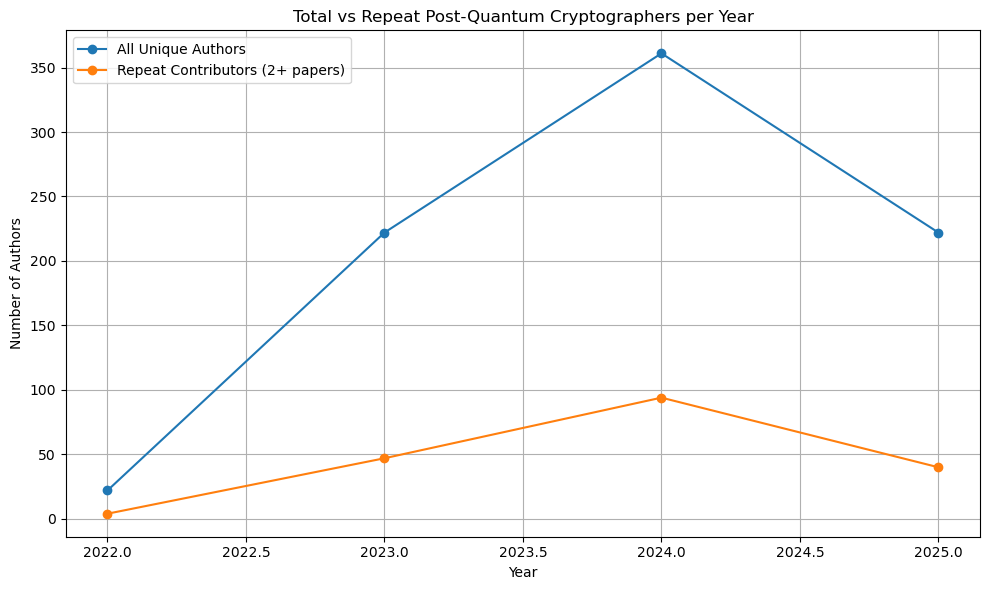

In [6]:
# 2+ papers
repeat_authors = author_counts[author_counts['Paper Count'] >= 2]['Author']

# Filter exploded dataframe for only repeat authors
repeat_df = df_exploded[df_exploded['authors'].isin(repeat_authors)]

# Count how many repeat authors published in each year
repeat_trend = repeat_df.groupby('year')['authors'].nunique().reset_index()
repeat_trend.columns = ['Year', 'Repeat Contributors']

# Merge with full set
merged = pd.merge(authors_per_year, repeat_trend, on='Year', how='left').fillna(0)

# Plot both
plt.figure(figsize=(10, 6))
plt.plot(merged['Year'], merged['Unique Authors'], label='All Unique Authors', marker='o')
plt.plot(merged['Year'], merged['Repeat Contributors'], label='Repeat Contributors (2+ papers)', marker='o')
plt.title("Total vs Repeat Post-Quantum Cryptographers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Authors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
total_unique = df_exploded['authors'].nunique()
repeat_2plus = author_counts[author_counts['Paper Count'] >= 2].shape[0]
repeat_3plus = author_counts[author_counts['Paper Count'] >= 3].shape[0]

print(f"Total unique authors: {total_unique}")
print(f"Authors with ≥2 papers: {repeat_2plus}")
print(f"Authors with ≥3 papers: {repeat_3plus}")


Total unique authors: 754
Authors with ≥2 papers: 112
Authors with ≥3 papers: 30
